<a href="https://colab.research.google.com/github/luigiselmi/dl_remote_sensing/blob/main/png_files_visual_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PNG files visual check
We assess the result of the transformation from TIFF bands to PNG images. We image and mask datasets are downloaded from an S3 bucket, unzipped and visualized.

In [5]:
import numpy as np
import os
import sys
from osgeo import gdal, osr, ogr
import pathlib
import PIL
from PIL import Image, ImageDraw
from skimage import io
from skimage import exposure
from skimage.io import imread
import tifffile as tiff
import matplotlib
import matplotlib.pyplot as plt
import zipfile
from zipfile import ZipFile
import warnings
warnings.filterwarnings('ignore')


We download the data in Colab using a presigned url

In [2]:
!wget 'https://selmilab-bucket.s3.eu-south-1.amazonaws.com/bigearthnet_pngs.zip' -O bigearthnet_png.zip

--2025-07-01 16:26:19--  https://selmilab-bucket.s3.eu-south-1.amazonaws.com/bigearthnet_pngs.zip
Resolving selmilab-bucket.s3.eu-south-1.amazonaws.com (selmilab-bucket.s3.eu-south-1.amazonaws.com)... 3.5.248.117, 3.5.250.23
Connecting to selmilab-bucket.s3.eu-south-1.amazonaws.com (selmilab-bucket.s3.eu-south-1.amazonaws.com)|3.5.248.117|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2025-07-01 16:26:19 ERROR 403: Forbidden.



In [3]:
!wget 'https://selmilab-bucket.s3.eu-south-1.amazonaws.com/bigearthnet_mask_pngs.zip' -O bigearthnet_mask_png.zip

--2025-07-01 16:26:43--  https://selmilab-bucket.s3.eu-south-1.amazonaws.com/bigearthnet_mask_pngs.zip
Resolving selmilab-bucket.s3.eu-south-1.amazonaws.com (selmilab-bucket.s3.eu-south-1.amazonaws.com)... 3.5.249.162, 3.5.250.0
Connecting to selmilab-bucket.s3.eu-south-1.amazonaws.com (selmilab-bucket.s3.eu-south-1.amazonaws.com)|3.5.249.162|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2025-07-01 16:26:43 ERROR 403: Forbidden.



In [6]:
def unzip_pngs(source_zip_file, target_folder):
    with ZipFile(source_zip_file, 'r') as zipObj:
        zipObj.extractall(path=f'{target_folder}')

In [7]:
unzip_pngs('bigearthnet_png.zip', 'images')

In [8]:
unzip_pngs('bigearthnet_mask_png.zip', 'masks')

In [9]:
def norm_image(image_array):
    '''
    This function takes a NumPy array as input, computes min and max
    and returns a normalized array with values in [0, 1]
    '''
    max_image = image_array.max()
    min_image = image_array.min()
    image_array_norm = (image_array - min_image) / (max_image - min_image + 1)
    return image_array_norm

In [16]:
def plot_examples(images_list, masks_list):
    #fig_rows = len(masks_list)
    fig_rows = 10
    fig, axs = plt.subplots(nrows=fig_rows, ncols=2, figsize=(5, 3), layout='constrained')
    for row in range(0, fig_rows):
        img = norm_image(np.array(Image.open(images_list[row])))
        msk = norm_image(np.array(Image.open(masks_list[row])))
        axs[row, 0].set_axis_off()
        axs[row, 1].set_axis_off()
        axs[row, 0].imshow(img)
        axs[row, 1].imshow(msk)

In [11]:
images_path = pathlib.Path('images')
images_list = [pathlib.Path(x) for x in images_path.iterdir()]
len(images_list)

28766

In [12]:
masks_path = pathlib.Path('masks')
masks_list = [pathlib.Path(x) for x in masks_path.iterdir()]
len(masks_list)

28766

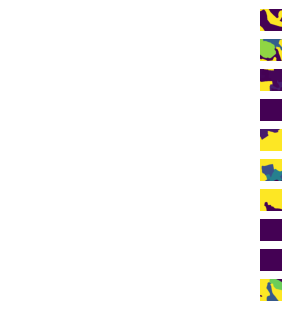

In [17]:
plot_examples(images_list, masks_list)